# Unit 2: Loading Engineering Data
----------------------------------

Once we understand the basics of working with Python in a Jupyter Notebook, our most fundamental task is to load a set of data to manipulate and analyze. Engineering data may come from different sources, such as: text files, spreadsheets or SQL databases. Python packages are available to easily import data from these sources. In future units, we will build upon this foundation and analyze the data that we have loaded using these techniques.

**After completing this unit, you should be able to:**

- Understand when to select the `numpy` or `pandas` library for loading data
- Load numeric data into a `numpy.ndarray` object
- Load mixed-format data into a `pandas.DataFrame` object
- Calculate basic statistics for a dataset
- Save data to a file

## 2.1. The `numpy` package for processing numerical data

In Unit 1 we discussed the Python ecosystem, including the fact that there are many add-on packages that extend the basic functionality of Python. One fundamental package for engineering analysis is [`numpy`](https://numpy.org/doc/stable/) (*Num*erical *Py*thon). Specifically, this package defines an object called the `ndarray` (n-dimensional array), which is used for vector and matrix calculations. As we'll see, this data structure looks similar to the list object that we learned previously but it is far superior for data analysis. The `numpy` package also includes functions for creating, loading, modifying and saving data in the `ndarray` object. The functions in this package are written in the C programming language, and take advantage of CPU parallelism to offer high performance (computing speed). Luckily, you don't need to know how this works to benefit from it. 

To use the `numpy` package, you will add the following `import` line at the top of your notebook. Note that we are renaming (or, if you prefer, creating an alias for) the `numpy` package as `np` in this instruction. You will commonly find this type of shorthand used. Now, when we want to reference `numpy`, we'll instead type `np`. The popular Python packages have a typical abbreviation that you will see referenced in literature. Technically, you could create any alias (using our variable naming rules): `curts_favorite_package`, `package1`, `a`, ... but you'll find that `np` is the standard for `numpy`.

```
import numpy as np
```

### 2.1.1. Creating a 1-dimensional `ndarray`

There are several ways that we can create an array of values from scratch:

1. Passing a Python list containing the values
2. Generating a sequence (range) of values based on a starting point and step interval (useful for plotting, or evaluating a function at different points)
3. Generating $n$ values evenly distributed between a start and end point (useful for plotting, or evaluating a function at different points)
4. Generating $n$ random values

Examples are provided in the code cell below. 

Using a Python list is pretty straightforward: simply pass the list (or a variable name that references a list) to the `np.array(list)` function. 

The *array range* or `np.arange(start, stop, step)` allows us to generate an array as an arithmetic sequence. We define the start, stop and step values as parameters in the function. The start value will be the first element in the array. The step value is the number by which we count to generate the sequence (this can be real positive or negative number). The sequence will continue **up to, but not including** the stop value.

There are two related functions, `np.linspace(start, stop, n)` and `np.logspace(start, stop, n)`, that allow us to generate $n$ elements between a start and stop value. Unlike the `np.arange()` function, both the start and stop values **are included** in the array. As the names implies, `np.linspace()` will distribute the values linearly and `np.logspace()` will distribute values logarithmically. When using `np.logspace()` the start and top are provided in terms of the power of 10, forming a range [$10^{start}, 10^{stop}$]. This can be helpful when evaluating a function that will be plotted on a log scale.

Finally, we can use the `np.random` module to generate random numbers. This module contains a function `np.random.random(n)` that generates a 1 $\times$ $n$ array of random numbers from the interval [0, 1). Note that the duplication of the word *random* is not a typo. This code calls the `random(n)` function from the `np.random` module, which can be a bit confusing. If you need to sample from other probability distributions, or generate random integers, there are other functions available in [`np.random`](https://numpy.org/doc/stable/reference/random/index.html) that you can look up and use.

In [1]:
import numpy as np

# create an array from a list
# the parameter is a list of values (or a variable name that represents a list)
arr_from_list = np.array([1, 2, 3])
print(f'array_from_list: {arr_from_list}')

# create an array as a sequence of values
# the parameters are the starting value, the stop value (which is not included), 
# and the step value
arr_range = np.arange(1, 11, 1)
print(f'arr_range: {arr_range}')

# create an array of 5 values, logarithmically distributed between 1 (10^0) 
# and 100 (10^2)
arr_logspace = np.logspace(0, 2, 5)
print(f'arr_logspace: {arr_logspace}')

# create an array of random values between 0, 1
# the parameter is the number of values
arr_random = np.random.random(6)
print(f'arr_random: {arr_random}')

array_from_list: [1 2 3]
arr_range: [ 1  2  3  4  5  6  7  8  9 10]
arr_logspace: [  1.           3.16227766  10.          31.6227766  100.        ]
arr_random: [0.95918989 0.2702397  0.41853837 0.13001618 0.60309788 0.66936852]


### 2.1.2. Manipulating the data in an `ndarray`

Indexing and slicing the `ndarray` works just like `list`, so you can use the same techniques that we learned in Unit 1.

In [2]:
# the array uses the same indexing/slicing syntax as a Python list
arr_range_reversed = arr_range[::-1]
print(f'Reversed Array: {arr_range_reversed}')

arr_range_topfive = arr_range[:5]
print(f'First 5 Items: {arr_range_topfive}')

Reversed Array: [10  9  8  7  6  5  4  3  2  1]
First 5 Items: [1 2 3 4 5]


Unlike a standard Python `list`, we can apply math operators directly to an `ndarray`. This will apply the operation *element-wise* (to each item in the array individually). For example, to square all of the values in the array, we just square the array object. The `numpy` code takes care of the loop for us behind the scenes, so a list comprehension is not required. Because of how the `numpy` library is programmed, this will be much faster on large datasets versus list comprehensions. The return value is a new `ndarray`, which can be saved to a variable name. The existing array is not modified by this operation, but we can use the same name to save over it if we choose to.

In [3]:
arr_range**2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int32)

We can actually measure the performance improvement of using a `numpy.ndarray` versus a Python `list` to compute the square of a set of numbers. The code block below will measure the time to compute the square (element-wise) for arrays and lists of increasing length. When the results are generated, the code will create a plot of the results for you to see. We'll learn how the plotting code works in the next unit. This process of testing how execution time increases with increasingly large datasets is a *scaling analysis*. 

[]

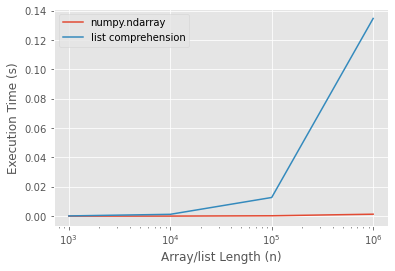

In [30]:
import matplotlib.pyplot as plt
from time import perf_counter

plt.style.use('ggplot')

# an array containing the number of elements, n, in the array
n_arr = 10**np.arange(3, 7, 1)

# empty arrays to hold the times that we measure for the math operation
time_list = np.zeros(len(n_arr))
time_ndarray = np.zeros(len(n_arr))

# measure the time to calculate hte square of each element in the array
# the loop steps through each array length that we defined above
for i, n in enumerate(n_arr):

    # generate an array of random numbers to test
    random_ndarray = np.random.random(n)

    # convert the array to a list for the list comprehension test
    random_list = random_ndarray.tolist()

    # measure the time for the ndarray
    time_start = perf_counter()
    squared_ndarray = random_ndarray**2
    time_end = perf_counter()
    time_ndarray[i] = time_end - time_start

    # measure the time for the ndarray
    time_start = perf_counter()
    squared_list = [x**2 for x in random_list]
    time_end = perf_counter()
    time_list[i] = time_end - time_start

# display the results
fig, ax = plt.subplots()

ax.plot(n_arr, time_ndarray, label='numpy.ndarray')
ax.plot(n_arr, time_list, label='list comprehension')

ax.set_xlabel('Array/list Length (n)')
ax.set_ylabel('Execution Time (s)')

plt.legend()

ax.semilogx()

For small datasets ($n>10^4$), we don't see a big difference in performance. However, as array size gets large, we see the benefits of the optimization (vectorization and parallel processing) built into the `numpy` package.

When executing other mathematical operations on an array, we will use versions of the math functions that are built-in to the `numpy` package -- not the basic `math` module functions. These functions are designed to process the `ndarray` efficiently. In general, they have the same names as the functions from the `math` module. We preface the function name with `np.` to indicate that we want the function that is coming from `numpy`. In the example below, the `sin` function has a parameter which takes an `ndarray` object, and returns another `ndarray` with the result.

Refer to the [Mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html) section of the `numpy` documentation for more detailed information.

In [4]:
np.sin(arr_random)

array([0.81872668, 0.26696245, 0.40642542, 0.12965019, 0.56719655,
       0.6204909 ])

The `ndarray` object also has methods that can be used to calculate basic statistics on the array values. These functions are called by writing the variable name, and then the function name, seperated by a period. No additional parameters are necessary, but we still must include the empty parentheses (`()`) to indicate that we are calling the function.

```
<variablename>.<functionname>()
```

Some examples of useful functions are given in the example below.

In [5]:
print(f'Minimum Value: {arr_random.min()}')
print(f'Maximum Value: {arr_random.max()}')
print(f'Mean: {arr_random.mean()}')
print(f'Standard Deviation: {arr_random.std()}')
print(f'Sum: {arr_random.sum()}')
print(f'Cumulative Sum: {arr_random.cumsum()}')

Minimum Value: 0.13001618225714007
Maximum Value: 0.9591898852453975
Mean: 0.5084084242197369
Standard Deviation: 0.27265968601348317
Sum: 3.050450545318421
Cumulative Sum: [0.95918989 1.22942959 1.64796796 1.77798414 2.38108202 3.05045055]


### 2.1.3. Saving and Loading Files

At some point, you'll need to save your results to a file for storage or to share with a colleague. For our purposes, we'll demonstrate the use of plain text files for storing data. These are files that you'll be able to open and read in a text viewer like Notepad, or import into a spreadsheet. You can also save data in a binary format that will take up less space on your hard drive. However, this won't be easily human-readable, so we'll skip it for now.

To save our `ndarray` to a text file, use the [`np.savetxt()`](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html) function. This requires you to provide a filename, and an `ndarray` as parameters. Optionally, you can apply formatting to the results, or change how columns in your array are separated. The default is a space (`' '`), but you may wish to set this to a comma (`','`) to create a comma-separated (csv) file.

In [6]:
np.savetxt('../../output/unit2_arr_range.txt', arr_range)

The first parameter gives the path to the file that we want to create, including the new file name. If we just used a file name (no directory name) the file would be saved in the *current working directory*, which is the directory where this Jupyter Notebook resides. Often, it's desirable to separate code and data/output files in a project to reduce clutter, so we have chosen to use a different storage location for this output.

For anyone familiar with working on the Windows or Linux command-line shell, the directory notation will be familiar. The double-period (`..`) means go up one level in the directory tree from where we are right now. 

- python-engineering-analytics
  - assets
  - data
  - output
  - units
    - 01-introduction
    - 02-loading-data
      - **unit02-lesson.ipynb** <- we are here
      - unit02-problems.ipynb
      - unit02-solutions.ipynb
    - ...

From where we are now, in the `02-loading-data` directory, we go up one level (`../`) to the `units` directory. Then, we go up another level (`../`) to the `python-engineering-analytics` directory. Then we can go down into the `output/` directory and finally assign a file name of `unit2_arr_range.txt`. Chaining these together gives us the filename string from the example.

After you have run this cell on your computer, you should see a new file appear in the output directory, called `unit2_arr_range.txt`. Open this file and you will see the array values, one per line. 

Loading a file is also a single line of code using `np.loadtxt()`. If we changed the formatting of the file that we saved (such as using a comma the delimiter character, we'll need to supply that parameter to the function also.

In [7]:
arr_range_reload = np.loadtxt('../../output/unit2_arr_range.txt')
arr_range_reload

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### 2.1.4. Multi-Dimensional Arrays

So far, we have looked only at 1-dimensional arrays (vectors). However, as the name suggests, the `ndarray` object can also handle 2-dimensional matrices and even higher-order structures. The `../../data/` directory houses two csv files (comma-separated) that each contains a 2-dimensional, 10 $\times$ 10 matrix: `matrix_A.csv` and `matrix_B.csv`. We'll load those files into memory, and use them for the next examples.

In [8]:
A = np.loadtxt('../../data/matrix_A.csv', delimiter=',')
B = np.loadtxt('../../data/matrix_B.csv', delimiter=',')

We can index or slice multi-dimensional arrays just like we did with 1-dimensional arrays. Inside of the square brackets (`[]`), we just have an index or slice associated with each dimension. These are separated by commas.

```
<ndarraynamee>[<rowslice>, <columnslice>]
```

If you want to return all of a row or column, use the colon (`:`) in that position.

In [9]:
# view the entire matrix
A

array([[0.592, 0.07 , 0.411, 0.96 , 0.833, 0.77 , 0.993, 0.452, 0.343,
        0.464],
       [0.221, 0.92 , 0.681, 0.949, 0.911, 0.106, 0.068, 0.85 , 0.231,
        0.117],
       [0.934, 0.72 , 0.409, 0.115, 0.128, 0.446, 0.981, 0.541, 0.04 ,
        0.686],
       [0.963, 0.808, 0.247, 0.399, 0.465, 0.087, 0.859, 0.348, 0.383,
        0.255],
       [0.607, 0.045, 0.204, 0.045, 0.145, 0.905, 0.694, 0.064, 0.241,
        0.256],
       [0.972, 0.995, 0.65 , 0.218, 0.367, 0.018, 0.139, 0.054, 0.862,
        0.558],
       [0.429, 0.069, 0.114, 0.15 , 0.018, 0.616, 0.042, 0.963, 0.77 ,
        0.904],
       [0.751, 0.544, 0.981, 0.917, 0.685, 0.658, 0.113, 0.151, 0.087,
        0.281],
       [0.571, 0.   , 0.586, 0.044, 0.936, 0.893, 0.229, 0.257, 0.201,
        0.05 ],
       [0.732, 0.21 , 0.581, 0.357, 0.687, 0.348, 0.261, 0.147, 0.57 ,
        0.26 ]])

In [10]:
# view the value at row=1, column=1 (remember that we start counting at 0)
A[1, 1]

0.92

In [11]:
# view the first 3 rows, all columns
A[:3, :]

array([[0.592, 0.07 , 0.411, 0.96 , 0.833, 0.77 , 0.993, 0.452, 0.343,
        0.464],
       [0.221, 0.92 , 0.681, 0.949, 0.911, 0.106, 0.068, 0.85 , 0.231,
        0.117],
       [0.934, 0.72 , 0.409, 0.115, 0.128, 0.446, 0.981, 0.541, 0.04 ,
        0.686]])

In [12]:
# view row 1, columns 4-6
A[1, 4:7]

array([0.911, 0.106, 0.068])

We can also introduce the matrix multiplication operator, `@`, which will perform row $\times$ column multiplication on vectors and matrices. As you can see in the example below, matrices `A` and `B` are actually inverses of each other, because their matrix product is the idenity matrix.

We'll use the `np.round()` function to perform an element-wise rounding (to 1 decimal place) on each of the values to clean up the output. This function takes an `ndarray` as its first parameter and returns a new, rounded, `ndarray`.

In [13]:
# matrix multiplication of A and B
C = A@B
np.round(C, 1)

array([[ 1.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.],
       [-0.,  1., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.],
       [-0.,  0.,  1., -0., -0.,  0., -0., -0., -0.,  0.],
       [-0.,  0.,  0.,  1.,  0., -0., -0., -0., -0.,  0.],
       [-0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -0., -0.],
       [-0., -0.,  0., -0.,  0.,  1., -0., -0., -0.,  0.],
       [-0.,  0., -0.,  0.,  0.,  0.,  1.,  0.,  0., -0.],
       [-0.,  0.,  0., -0.,  0., -0., -0.,  1., -0.,  0.],
       [-0.,  0.,  0., -0.,  0., -0., -0., -0.,  1.,  0.],
       [-0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  1.]])

We can learn about the size of an `ndarray` by accessing its `size` or `shape` properties. These are not functions, so we do not write the parentheses (`()`) after the name.

- `ndarray.size` provides the total number of elements in the array
- `ndarray.shape` provides the length of the array in each dimension

For a 1-dimensional array, such as `arr_random`, we see that the shape only has one value of `5`, but it is enclosed in parenthesis `()`. This is because the `shape` property has a type of `tuple` which, for our purposes, we can view a `tuple` as a special type of list. The main difference between a `list` and a `tuple` is that the items in a `tuple` cannot be modified after it is created. The `ndarray.shape` property of the 2-dimensional matrix shows us that the row count and column count are each 10.

In [14]:
arr_random.size

6

In [15]:
arr_random.shape

(6,)

In [16]:
A.size

100

In [17]:
A.shape

(10, 10)

Behind the scenes, the computer is storing your n-dimensional array is stored as a single 1-dimensional array and our ability to index by rows and columns is really just a convenience. We can ask the computer to change the shape, so that we can index the array differently. 

We learned how to generated 1-dimensional arrays, so how do we manipulate these into matrices? With the `ndarray.reshape()` function, we can supply a new shape (as either a `tuple` or `list`).

In [31]:
arr_random.reshape((3, 2))

array([[0.95918989, 0.2702397 ],
       [0.41853837, 0.13001618],
       [0.60309788, 0.66936852]])

In [32]:
arr_random.reshape((2, 3))

array([[0.95918989, 0.2702397 , 0.41853837],
       [0.13001618, 0.60309788, 0.66936852]])

From these examples, we see that `numpy` is reshaping the data in *row-major* order (C-style). This means that each element is filled into the first row, across the columns, before moving on to the next row. For another clear example, see below. Here, we create a 100-element sequence (using the default values of starting at 0 and counting by 1), and reshape that to have 20 rows and 5 columns. Notice that we can count across the rows.

In [33]:
np.arange(100).reshape((20, 5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64],
       [65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74],
       [75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84],
       [85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94],
       [95, 96, 97, 98, 99]])

## 2.2. The `pandas` package for mixed-format data

While `numpy` is extremely useful (and efficient) for numerical analysis and matrix math, sometimes it is more convenient to work with a dataset that has named columns, or one that contains a mix of datatypes (dates, strings, numbers) that are not supported in a single `ndarray`. This is where the [`pandas`](https://pandas.pydata.org/) package can be extremely useful. To import the `pandas` package, we need to add the following line of code:

```
import pandas as pd
```

Like the abbreviation `np` for `numpy`, it is customary to use the abbreviation of `pd` for `pandas`.

In `pandas`, data is organized in an object called a `DataFrame`. Think about a `DataFrame` as a table in a spreadsheet, with named columns and a row index. The row index can be just the row number, or we can assign an index of a different data type. 

### 2.2.1. Loading data into a `pandas.DataFrame`

While we can build a `DataFrame` from scratch, our mission is to analyze engineering data so we're most interested in loading data that already exists. There are three primary forms that we consider loading data:

1. A comma- or tab-delimited plain text file, such as a csv or txt
2. An Excel spreadsheet file (xlsx)
3. The result set from a SQL SELECT query

Once the `DataFrame` is populated, it doesn't matter where the data came from. The process for using these sources is similar, but we'll provide an example of each. First, we'll look at a 2-column csv file using the `pd.read_csv()` function. The directory path is written in the same way as we learned above.

Once we read the file into a `DataFrame` object, it can be helpful to use the `DataFrame.head()` function to view the top 5 rows. Note that our columns in a `DataFrame` have names associated with them, which are displayed when we print out the data.

In [21]:
import pandas as pd

# read a .csv file into a DataFrame variable named df
df = pd.read_csv('../../data/pcr-polyethylene_gc-fid.csv')

# display the top n rows in the DataFrame named df (defaults to n=5 if blank)
df.head(10)

,minutes,fid
0,0.833318,0.463005
1,0.834152,0.461075
2,0.834985,0.462688
3,0.835818,0.465777
4,0.836652,0.468805
5,0.837485,0.470081
6,0.838318,0.469796
7,0.839151,0.469420
8,0.839985,0.467093
9,0.840818,0.465238


Reading an Excel file is very similar, but uses a function called `pd.read_excel()`. In addition to the file path, we need to identify the name of the worksheet in the file, using the parameter `sheet_name`. 

Your data may also be present in a database that you can query into a `DataFrame`. The langage for querying a relational database, called *structured query language* or **SQL** could be a unit unto itself. So, this will be a simple introduction to introduce the capability. If you are (or later become) familiar with SQL, you'll be able to integrate this with your Python analytics skills.

### 2.2.2. Selecting data from a `DataFrame`

Selecting data from the `pd.DataFrame` is similar to what we have demonstrated for the Python `list` and `np.ndarray`, but there are a few key differences. First, we can select individual columns by using the column name. The row index value is maintained, and is still displayed.

In [22]:
# select the entire column named 'fid'
df['fid']

0        0.463005
1        0.461075
2        0.462688
3        0.465777
4        0.468805
           ...   
53179    3.115661
53180    3.084669
53181    3.071105
53182    3.082195
53183    3.111270
Name: fid, Length: 53184, dtype: float64

Further, we apply functions such as `DataFrame.head(n)` or `DataFrame.tail(n)` to just the selected column.

In [23]:
df['fid'].tail(10)

53174    3.154023
53175    3.181481
53176    3.192894
53177    3.182362
53178    3.152016
53179    3.115661
53180    3.084669
53181    3.071105
53182    3.082195
53183    3.111270
Name: fid, dtype: float64

To select specific rows, we need to access the `DataFrame.iloc` property, as shown below. Here, we use `iloc[10:20]` is used to get the slice of rows on the interval [10, 20). 

In [24]:
df.iloc[10:20]

,minutes,fid
10,0.841651,0.464645
11,0.842485,0.464104
12,0.843318,0.463338
13,0.844151,0.461775
14,0.844985,0.463340
15,0.845818,0.463046
16,0.846651,0.460759
17,0.847485,0.457886
18,0.848318,0.458167
19,0.849151,0.459737


More useful can be filtering based on values in the data itself. For instance, we can use a filter to select all rows of the `DataFrame` where the test time is greater than or equal to 10 minutes. Let's dissect this a little further. The inner expression, `df['minutes'] >= 10`, creates a series of `True`/`False` values, one for each row of the data set. This series of `True`/`False` is then used to select the rows of `df` in the outer expression. Any rows for which that condition is `True` are selected and returned.

In [25]:
df[df['minutes'] >= 10]

,minutes,fid
11001,10.000652,0.000000
11002,10.001485,0.000000
11003,10.002319,0.000000
11004,10.003152,0.000000
11005,10.003985,0.000000
...,...,...
53179,45.148349,3.115661
53180,45.149182,3.084669
53181,45.150015,3.071105
53182,45.150848,3.082195


### 2.2.3. Calculating basic statistics

Just like the `np.ndarray`, the `pd.DataFrame` has basic statistical functions. If you execute these on the `DataFrame`, you'll apply the function to each column. Alternatively, we can select a column (as we learned above) and then apply the function.

In [26]:
# calculate statistics for every column in the DataFrame
print(f'Minimum Value: {df.min()}')
print(f'Maximum Value: {df.max()}')
print(f'Mean: {df.mean()}')
print(f'Standard Deviation: {df.std()}')
print(f'Sum: {df.sum()}')
print(f'Cumulative Sum: {df.cumsum()}')

Minimum Value: minutes    0.833318
fid        0.000000
dtype: float64
Maximum Value: minutes     45.151682
fid        514.773091
dtype: float64
Mean: minutes    22.992500
fid         6.628462
dtype: float64
Standard Deviation: minutes    12.793970
fid        23.609411
dtype: float64
Sum: minutes    1.222833e+06
fid        3.525281e+05
dtype: float64
Cumulative Sum:             minutes            fid
0      8.333182e-01       0.463005
1      1.667470e+00       0.924081
2      2.502455e+00       1.386769
3      3.338273e+00       1.852546
4      4.174924e+00       2.321351
...             ...            ...
53179  1.222653e+06  352515.771460
53180  1.222698e+06  352518.856128
53181  1.222743e+06  352521.927233
53182  1.222788e+06  352525.009428
53183  1.222833e+06  352528.120698

[53184 rows x 2 columns]


In [27]:
# calculate statistics for just the 'fid' column in the DataFrame
print(f'Minimum Value: {df["fid"].min()}')
print(f'Maximum Value: {df["fid"].max()}')
print(f'Mean: {df["fid"].mean()}')
print(f'Standard Deviation: {df["fid"].std()}')
print(f'Sum: {df["fid"].sum()}')
print(f'Cumulative Sum: {df["fid"].cumsum()}')

Minimum Value: 0.0
Maximum Value: 514.7730906
Mean: 6.6284619565696214
Standard Deviation: 23.60941069708044
Sum: 352528.120698199
Cumulative Sum: 0             0.463005
1             0.924081
2             1.386769
3             1.852546
4             2.321351
             ...      
53179    352515.771460
53180    352518.856128
53181    352521.927233
53182    352525.009428
53183    352528.120698
Name: fid, Length: 53184, dtype: float64


This method works, but `pandas` gives us an easier way - the `DataFrame.describe()` function. You can use this to calculate the mean, min, max, stdev and quartiles of each column.

In [28]:
df.describe()

,minutes,fid
count,53184.000000,53184.000000
mean,22.992500,6.628462
std,12.793970,23.609411
min,0.833318,0.000000
25%,11.912909,0.358469
50%,22.992500,2.298928
75%,34.072091,4.849412
max,45.151682,514.773091


### 2.2.4. Saving a `DataFrame` to a file

The return value for the `DataFrame.describe()` function is, itself, a `DataFrame`. So, we might want to save this result to a file to share with a colleague. Like `numpy`, we can easily save a `DataFrame` as a csv file. The two examples below are equivalent. In the first, we store the return value from the `DataFrame.describe()` function as a variable named `describe_df`. Then, in a second step, we save this to a file using the `DataFrame.to_csv()` function. This is useful if we need a copy of the result in memory, so that we can use it later on in our notebook. However, if we do not need to use the result again, we can use the second option which does not store the result in the computer's memory.

In [34]:
# first, store the result in a variable and then save
describe_df = df.describe()
describe_df.to_csv('../../output/unit2_dataframe.csv')

# save result directly, without storing in a variable
df.describe().to_csv('../../output/unit2_dataframe.csv')

In [35]:
describe_df.loc['mean']

minutes    22.992500
fid         6.628462
Name: mean, dtype: float64

--------------
## Next Steps:

1. Complete the [Unit 2 Problems](./unit02-solutions.ipynb) to test your understanding
2. Advance to [Unit 3](../03-basic-plotting/unit03-lesson.ipynb) when you're ready for the next step